In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
base_path = './dataset-landmark'

train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
validation_path = os.path.join(base_path, 'valid')

Classes: ['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']
Number of classes: 6
Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


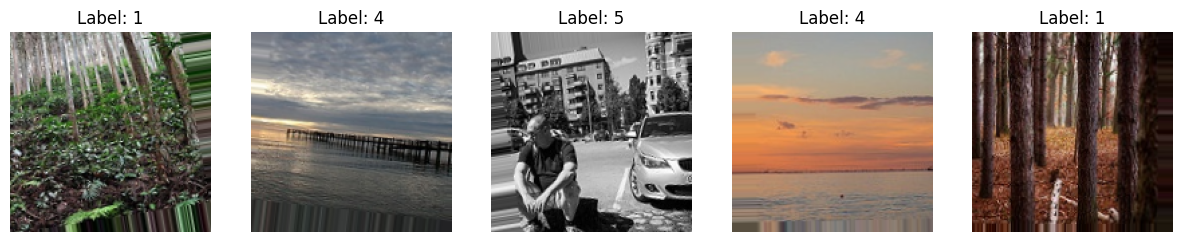

In [11]:
image_size = (150, 150)
batch_size = 64
channels = 3

# Get classes
classes = os.listdir(train_path)
print(f'Classes: {classes}')
num_classes = len(classes)
print(f'Number of classes: {num_classes}')

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

validation_dataset = validation_datagen.flow_from_directory(
    validation_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Visualize processed images
def visualize_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    images, labels = next(dataset)

    images = np.clip(images, 0, 1)
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {np.argmax(labels[i])}')
        plt.axis('off')
    plt.show()

visualize_images(train_dataset)

In [12]:
def build_cnn_3conv(input_shape, num_classes=6):
    model = Sequential()

    # # Conv block 1: 16 filtros
    model.add(Conv2D(16, (3,3), activation='relu', padding='same',
                            input_shape=input_shape))
    model.add(MaxPooling2D((2,2))) 

    # Conv block 2: 32 filtros
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    # Conv block 3: 64 filtros
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    # Conv block 3: 64 filtros
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    # Conv block 3: 128 filtros
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    # Añadir Dropout para reducir overfitting
    model.add(Dropout(0.3))

    # Aplanar y capa de salida
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [13]:
model = build_cnn_3conv(input_shape=(150,150,3), num_classes=num_classes)
model.summary()

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │        12,294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,662 (572.90 KB)

 Trainable params: 146,662 (572.90 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Entrenar el modelo
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset, verbose=1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 70s 390ms/step - accuracy: 0.4219 - loss: 1.4109 - val_accuracy: 0.5883 - val_loss: 1.0725
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 71s 401ms/step - accuracy: 0.6333 - loss: 0.9333 - val_accuracy: 0.7249 - val_loss: 0.7586
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 72s 407ms/step - accuracy: 0.7073 - loss: 0.7965 - val_accuracy: 0.7708 - val_loss: 0.6375
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 76s 429ms/step - accuracy: 0.7321 - loss: 0.7280 - val_accuracy: 0.7701 - val_loss: 0.6404
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 75s 427ms/step - accuracy: 0.7580 - loss: 0.6606 - val_accuracy: 0.7897 - val_loss: 0.5688
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 72s 407ms/step - accuracy: 0.7853 - loss: 0.5922 - val_accuracy: 0.7858 - val_loss: 0.5845
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 75s 425ms/step - accuracy: 0.7894 - loss: 0.5842 - val_accuracy: 0.8011 - val_loss: 0.5279
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 87s 495ms/step - accuracy: 0.8059 - loss: 0

In [15]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy:.4f}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8962 - loss: 0.3397
Test accuracy: 0.8773


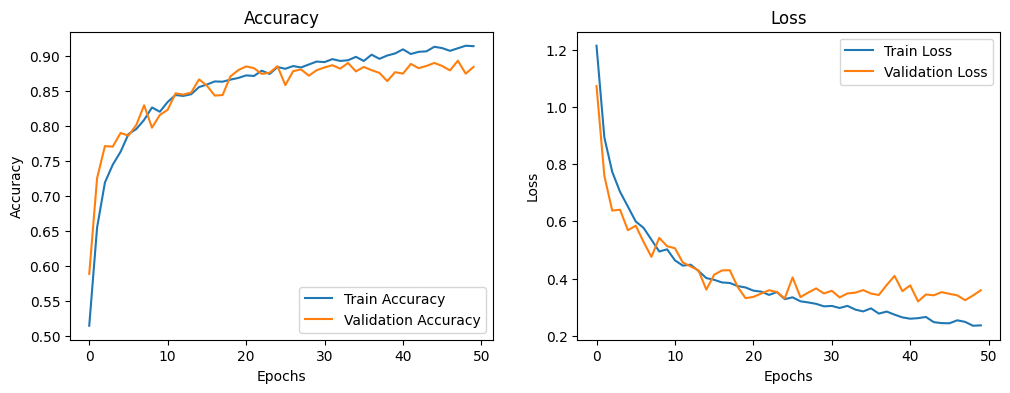

In [16]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history)

In [17]:
def get_predictions(dataset, model):
    y_true = dataset.classes
    y_pred = model.predict(dataset, verbose=0)
    y_pred = np.argmax(y_pred, axis=1)
    return y_true, y_pred

y_true, y_pred = get_predictions(test_dataset, model)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

Classification Report:
              precision    recall  f1-score   support

      forest       0.82      0.92      0.86       437
   buildings       0.95      0.98      0.97       474
     glacier       0.84      0.80      0.82       553
      street       0.81      0.83      0.82       525
    mountain       0.92      0.89      0.90       510
         sea       0.93      0.87      0.90       501

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



<Figure size 1000x800 with 0 Axes>

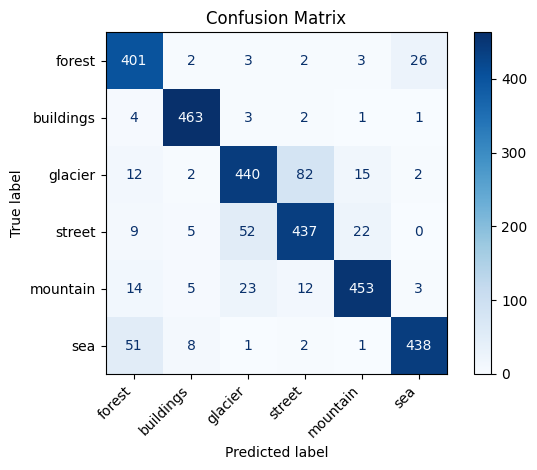

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    
    plt.figure(figsize=(10, 8))
    cm_display.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)

In [19]:
model.save('intel_image_model.keras')